In [1]:
def true_positive(y_pred,y_true):
    count = 0
    for yp,yt in zip(y_pred,y_true):
        if yp==yt==1:
            count+=1
    return count

In [4]:
a = [1,0,1,1,0,1,0]
b = [1,1,0,1,0,1,0]

In [5]:
true_positive(b,a)

3

In [7]:
def true_negative(y_pred,y_true):
    count=0
    for yp,yt in zip(y_pred,y_true):
        if yp==yt==0:
            count+=1
    return count

In [8]:
true_negative(b,a)

2

In [9]:
def false_positive(y_pred,y_true):
    count=0
    for yp,yt in zip(y_pred,y_true):
        if yp==1 and yt==0:
            count+=1
    return count

In [10]:
false_positive(b,a)

1

In [11]:
def false_negative(y_pred,y_true):
    count=0
    for yp,yt in zip(y_pred,y_true):
        if yp==0 and yt==1:
            count+=1
    return count

In [12]:
false_negative(b,a)

1

### Accuracy

In [13]:
def acc(y_pred,y_true):
    TP = true_positive(y_pred,y_true)
    TN = true_negative(y_pred,y_true)
    FN = false_negative(y_pred,y_true)
    FP = false_positive(y_pred,y_true)
    
    return (TP+TN)/(TP+TN+FP+FN)

In [14]:
acc(b,a)

0.7142857142857143

In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(a,b)

0.7142857142857143

### Precision

In [17]:
def precision(y_true,y_pred):
    TP = true_positive(y_pred,y_true)
    FP = false_positive(y_pred,y_true)
    return TP/(TP+FP)

In [18]:
precision(a,b)

0.75

In [19]:
metrics.precision_score(a,b)

0.75

### Recall

In [20]:
def recall(y_true,y_pred):
    TP = true_positive(y_pred,y_true)
    FN = false_negative(y_pred,y_true)
    return TP/(TP+FN)

In [21]:
recall(a,b)

0.75

In [22]:
metrics.recall_score(a,b)

0.75

In [30]:
import numpy as np

In [50]:
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]

In [51]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,0.0490937, 0.0191491, 0.17554844,0.15952202, 0.03819563, 0.11639273,0.079377,0.08584789, 0.39095342,0.27259048, 0.03447096, 0.04644807,0.03543574, 0.18521942, 0.05934905,0.61977213, 0.33056815]
assert(len(y_true)==len(y_pred))

In [52]:
p=[]
r=[]
for i in threshold:
    temp = [1 if x>i else 0 for x in y_pred]
    pre = precision(y_true,temp)
    rec = recall(y_true,temp)
    p.append(pre)
    r.append(rec)

In [53]:
r

[0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Precision')

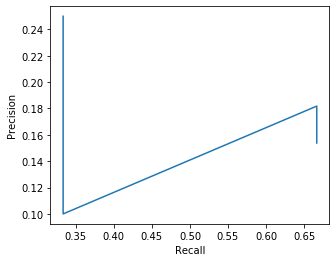

In [55]:
plt.figure(figsize=(5,4))
plt.plot(r,p)
plt.xlabel("Recall")
plt.ylabel("Precision")

### F-beta score

In [23]:
def f_beta_score(y_true,y_pred,beta):
    P = precision(y_true,y_pred)
    R = recall(y_true,y_pred)
    
    f_beta = ((1+(beta)**2)*P*R)/((beta**2)*P+R)
    
    print("f{} score is {}".format(beta,f_beta))

In [24]:
f_beta_score(a,b,1)

f1 score is 0.75


In [25]:
metrics.f1_score(a,b)

0.75

In [28]:
f_beta_score(a,b,2)

f2 score is 0.75


In [29]:
metrics.fbeta_score(a,b,2)

0.75